# Price Prediction of used Cars

### Steps

* Import Libraries
* Import Dataset
* Perform Data Analysis and EDA
* Spliting Data
* Data Preprocessing
* Choosing a model
* Traing the model
* Testing Model
* Model Evaluation

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder,normalize,StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor

#### Importing Dataset

In [2]:
df=pd.read_csv('cardekho_data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
print(df.Fuel_Type.unique())
print(df.Seller_Type.unique())
print(df.Transmission.unique())
print(df.Owner.unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


* [fuel,seller_type,transmission,owner] are categorical data features
*   'First Owner':0,
    'Second Owner':1,
    'Third Owner':2,
    'Fourth & Above Owner':3,

### DataPreprocessing

In [5]:
df.shape

(301, 9)

#### checking for Duplicates

In [6]:
df.duplicated().sum()

2

In [7]:
df.drop_duplicates(inplace=True)

#### Finding the categorical features and Encoding accordingly

#### Fuel

In [8]:
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


* Since order of ['fuel','seller_type','transmission'] categories in not important we will use ONE-HOT-ENCODING

In [9]:
df=pd.get_dummies(data=df,columns=['Fuel_Type','Seller_Type','Transmission'],dtype=int)

In [10]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1,1,0,0,1
1,sx4,2013,4.75,9.54,43000,0,0,1,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1,1,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1,1,0,0,1
4,swift,2014,4.60,6.87,42450,0,0,1,0,1,0,0,1


In [11]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

* Droping redundat Features => Car_Name

In [12]:
df.drop(columns=['Car_Name'],axis=1,inplace=True)

In [13]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,1,1,0,0,1
1,2013,4.75,9.54,43000,0,0,1,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,1,1,0,0,1
3,2011,2.85,4.15,5200,0,0,0,1,1,0,0,1
4,2014,4.60,6.87,42450,0,0,1,0,1,0,0,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    299 non-null    int64  
 1   Selling_Price           299 non-null    float64
 2   Present_Price           299 non-null    float64
 3   Kms_Driven              299 non-null    int64  
 4   Owner                   299 non-null    int64  
 5   Fuel_Type_CNG           299 non-null    int32  
 6   Fuel_Type_Diesel        299 non-null    int32  
 7   Fuel_Type_Petrol        299 non-null    int32  
 8   Seller_Type_Dealer      299 non-null    int32  
 9   Seller_Type_Individual  299 non-null    int32  
 10  Transmission_Automatic  299 non-null    int32  
 11  Transmission_Manual     299 non-null    int32  
dtypes: float64(2), int32(7), int64(3)
memory usage: 22.2 KB


* all data is numerical and there are no null values

* Changing year feature to no_of_year

In [15]:
import datetime
year= datetime.date.today().year
year

2023

In [16]:
df['No_of_years']=year-df['Year']
df.drop('Year',axis=1,inplace=True)

#### Cheking for outlires

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Selling_Price'),
  Text(1, 0, 'Present_Price'),
  Text(2, 0, 'Kms_Driven'),
  Text(3, 0, 'Owner'),
  Text(4, 0, 'Fuel_Type_CNG'),
  Text(5, 0, 'Fuel_Type_Diesel'),
  Text(6, 0, 'Fuel_Type_Petrol'),
  Text(7, 0, 'Seller_Type_Dealer'),
  Text(8, 0, 'Seller_Type_Individual'),
  Text(9, 0, 'Transmission_Automatic'),
  Text(10, 0, 'Transmission_Manual'),
  Text(11, 0, 'No_of_years')])

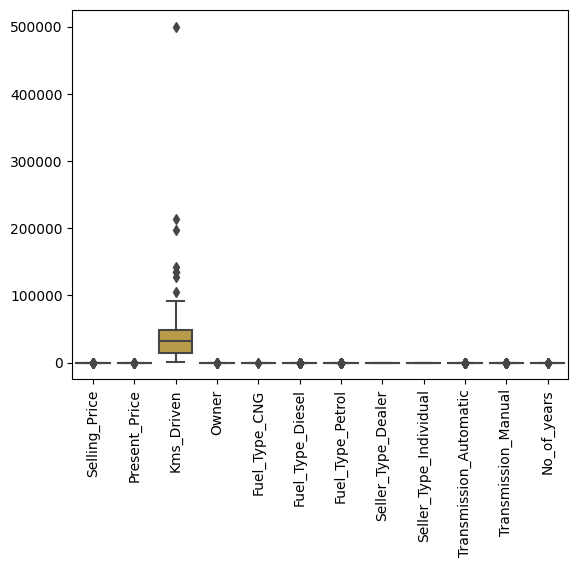

In [17]:
sns.boxplot(df)
plt.xticks(rotation=90)

* Selling_Price,Km_Drive,Present_Price,No_of_years  has outlires
* Since other features are Categorical features

####  Cheking Distribution of data

* selling_price is Positively Skewed
* we will use IQR method

In [18]:
def Outlier_rem(df,col):

    # Box Plot Before Capping
    figure, axes = plt.subplots(1, 2,figsize=(10, 5))
    figure.suptitle(col)
    axes[0].set_title('Befor')
    axes[1].set_title('After')
    plt_x=sns.boxplot(ax=axes[0], data=df[col])
    
    # Finding IQR
    percetile25=df[col].quantile(0.25)
    percetile75=df[col].quantile(0.75)
    IQR=percetile75-percetile25
    
    # Finding Upper and Lower Limit
    upper_limit=percetile75+1.5*IQR
    lower_limit=percetile25-1.5*IQR
    
    # Number of Outlires Before Capping
    upper_out=df[df[col]>upper_limit].shape[0]
    lower_out=df[df[col]<lower_limit].shape[0]

    # Capping
    df[col]=np.where(
        df[col]>upper_limit,
        upper_limit,
        np.where(
            df[col]<lower_limit,
            lower_limit,
            df[col]
        )
    )
    # Number of Outlires After Capping
    upper_out=df[df[col]>upper_limit].shape[0]
    lower_out=df[df[col]<lower_limit].shape[0]

    # Box Plot After Capping
    plt_y=sns.boxplot(ax=axes[1], data=df[col])
    plt.show()
    
    # Printing Values
    print(col)
    print(f'percetile25:{percetile25}\npercetile75:{percetile75}')
    print(f'upper_limit:{upper_limit}\nlower_limit:{lower_limit}')
    print(f'Outliers Above Upper limit Befor:{upper_out}')
    print(f'Outliers Above lower limit Before:{lower_out}')
    print(f'Outliers Above Upper limit After:{upper_out}')
    print(f'Outliers Above lower limit After:{lower_out}\n\n\n')

In [19]:
df.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Dealer', 'Seller_Type_Individual',
       'Transmission_Automatic', 'Transmission_Manual', 'No_of_years'],
      dtype='object')

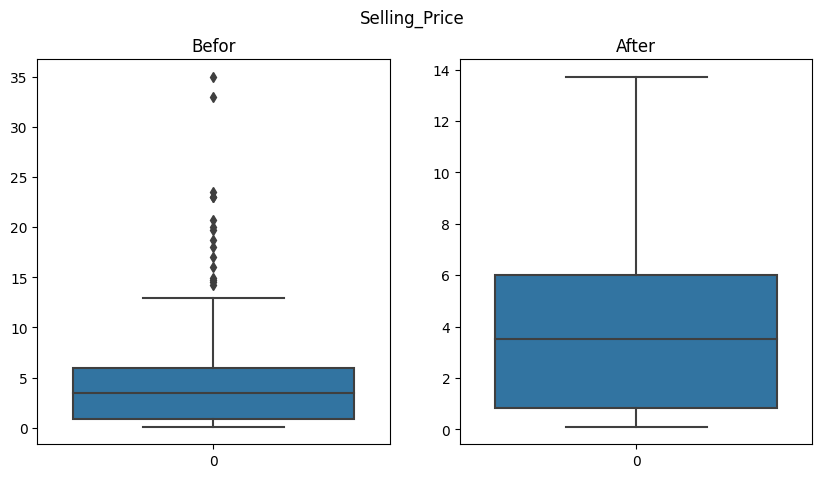

Selling_Price
percetile25:0.8500000000000001
percetile75:6.0
upper_limit:13.725000000000001
lower_limit:-6.875
Outliers Above Upper limit Befor:0
Outliers Above lower limit Before:0
Outliers Above Upper limit After:0
Outliers Above lower limit After:0





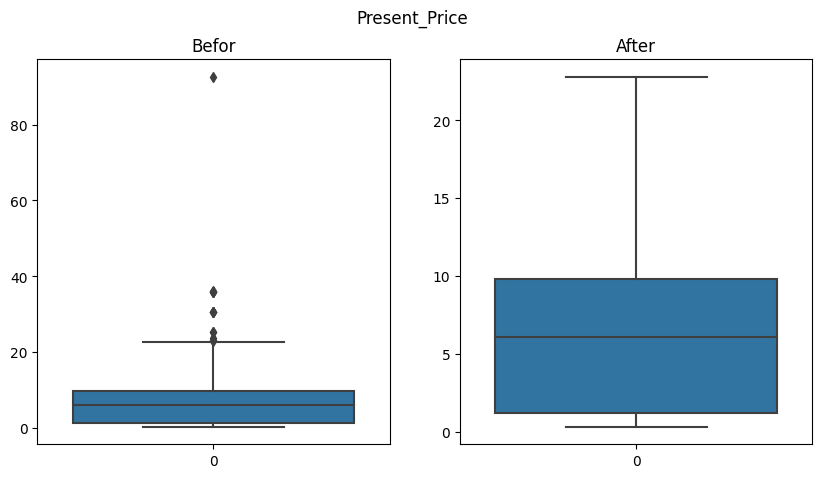

Present_Price
percetile25:1.2
percetile75:9.84
upper_limit:22.8
lower_limit:-11.760000000000002
Outliers Above Upper limit Befor:0
Outliers Above lower limit Before:0
Outliers Above Upper limit After:0
Outliers Above lower limit After:0





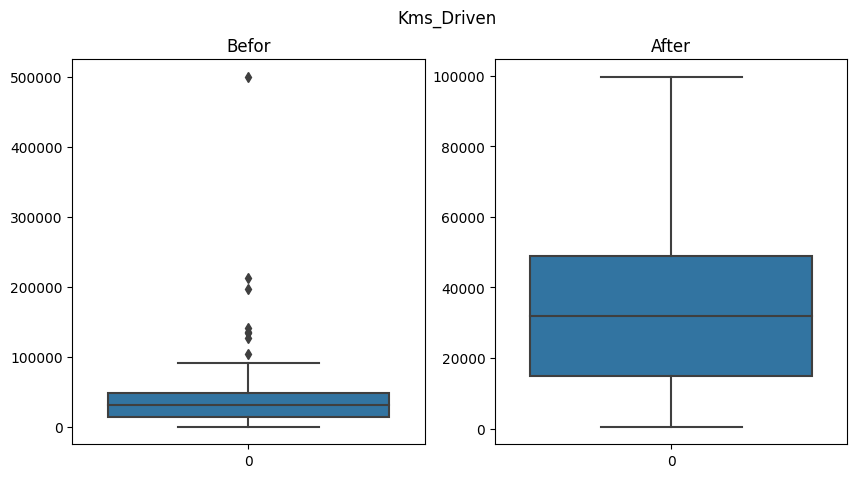

Kms_Driven
percetile25:15000.0
percetile75:48883.5
upper_limit:99708.75
lower_limit:-35825.25
Outliers Above Upper limit Befor:0
Outliers Above lower limit Before:0
Outliers Above Upper limit After:0
Outliers Above lower limit After:0





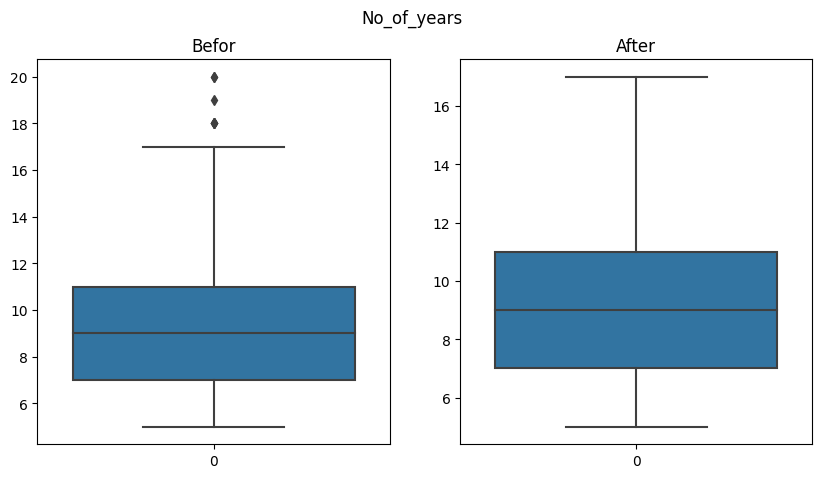

No_of_years
percetile25:7.0
percetile75:11.0
upper_limit:17.0
lower_limit:1.0
Outliers Above Upper limit Befor:0
Outliers Above lower limit Before:0
Outliers Above Upper limit After:0
Outliers Above lower limit After:0





In [20]:
cols=['Selling_Price', 'Present_Price', 'Kms_Driven','No_of_years']
for i in cols:
    Outlier_rem(df=df,col=i)

* We will use 'Capping' to handel outliers in selling_price
* there are many outliers i.e 170 around 4.7% of data
* there are extrem outliers in data
* data is heavily skwed


#### skwenes

Present_Price
1.0024406648850501


<Figure size 640x480 with 0 Axes>

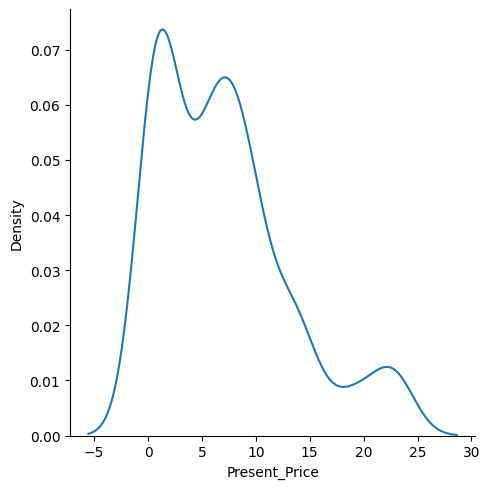

Selling_Price
0.9975917476178159


<Figure size 640x480 with 0 Axes>

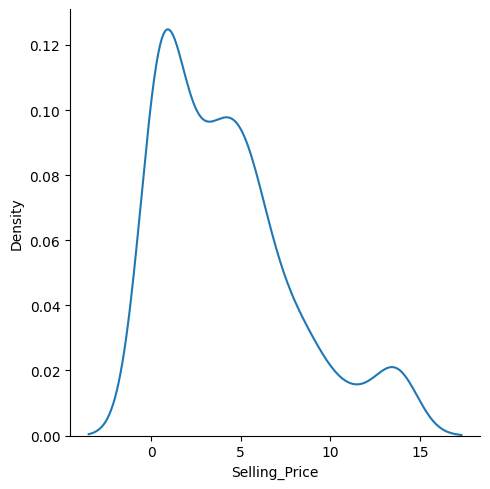

Kms_Driven
0.7795460844479444


<Figure size 640x480 with 0 Axes>

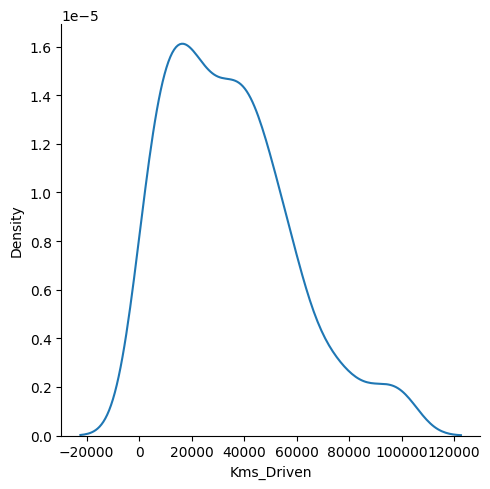

No_of_years
1.0184871786102319


<Figure size 640x480 with 0 Axes>

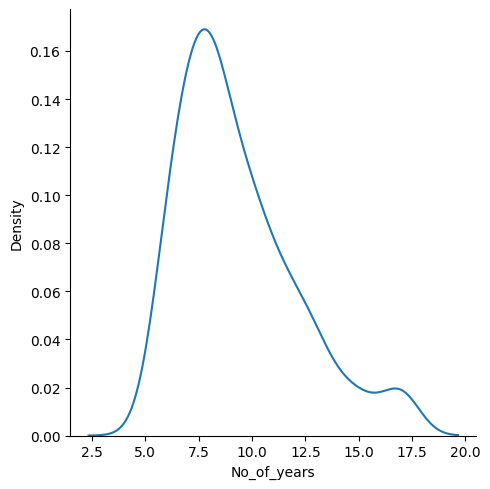

In [21]:
import warnings
warnings.filterwarnings('ignore')

skw={}

for col in ['Present_Price','Selling_Price','Kms_Driven','No_of_years']:
    print(col)
    print(df[col].skew())
    plt.figure()
    sns.displot(df[col],kind='kde')
    plt.show()
    skw[col]=df[col].skew()

##### most of the features has skwnes

In [22]:
skw

{'Present_Price': 1.0024406648850501,
 'Selling_Price': 0.9975917476178159,
 'Kms_Driven': 0.7795460844479444,
 'No_of_years': 1.0184871786102319}

* reducing the skwenes of thos features which don't have high corr() with target variable

<Axes: >

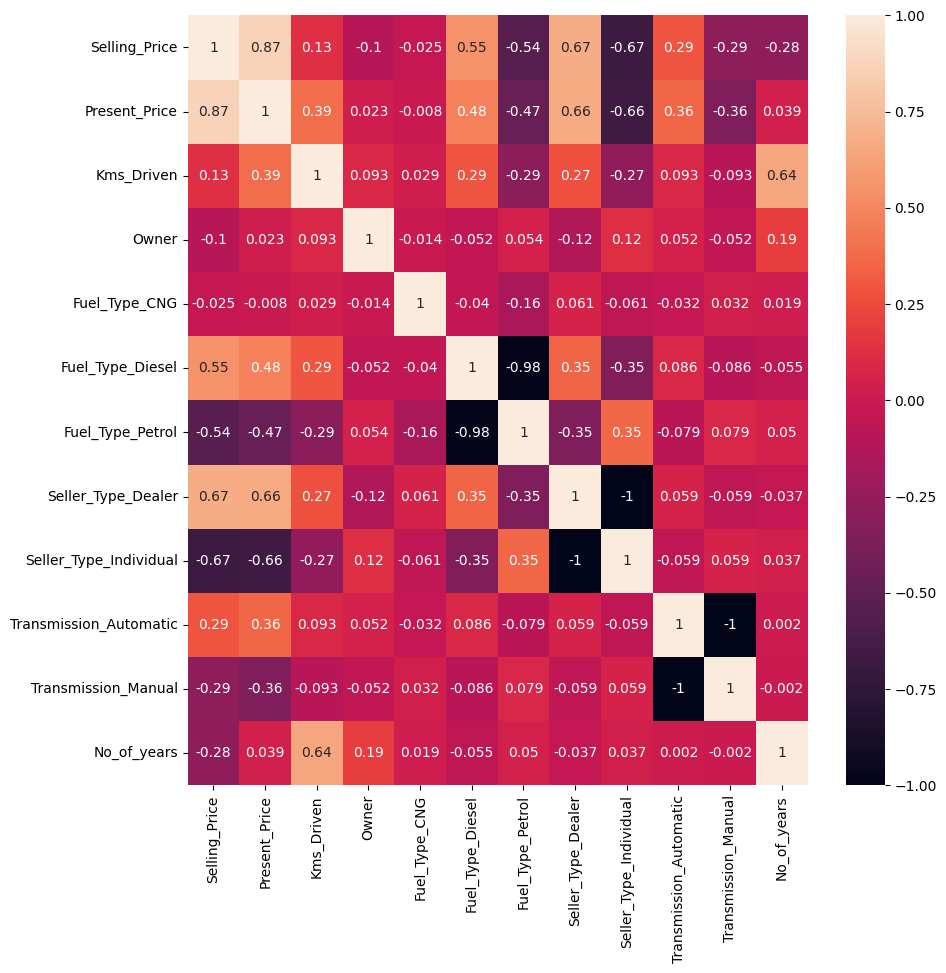

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [24]:
for col in ['Present_Price','Selling_Price','Kms_Driven','No_of_years']:
    print(col)
    print(df[col].skew())
    df[col]=np.sqrt(df[col])
    print(df[col].skew())

Present_Price
1.0024406648850501
0.1989012962634335
Selling_Price
0.9975917476178159
0.2060207428366881
Kms_Driven
0.7795460844479444
-0.0472285244498637
No_of_years
1.0184871786102319
0.7278997594949933


Present_Price
0.1989012962634335


<Figure size 640x480 with 0 Axes>

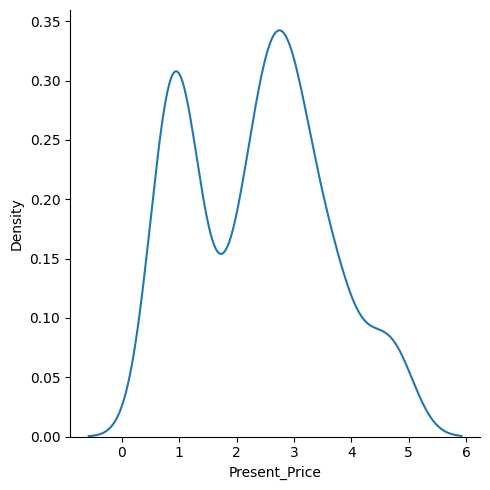

Selling_Price
0.2060207428366881


<Figure size 640x480 with 0 Axes>

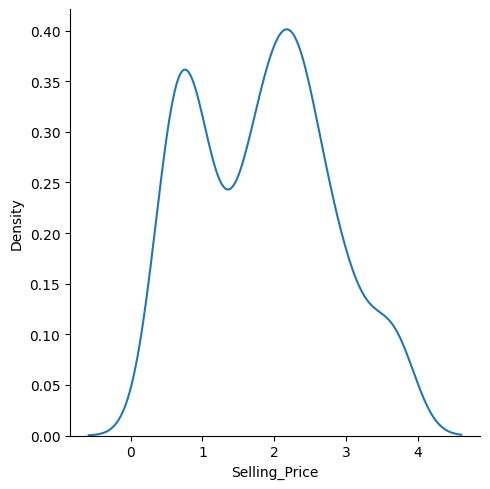

Kms_Driven
-0.0472285244498637


<Figure size 640x480 with 0 Axes>

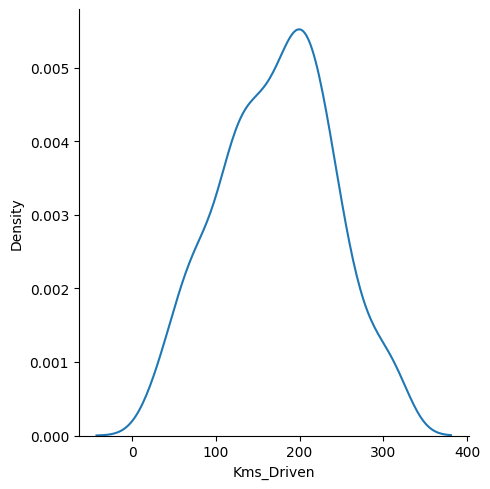

No_of_years
0.7278997594949933


<Figure size 640x480 with 0 Axes>

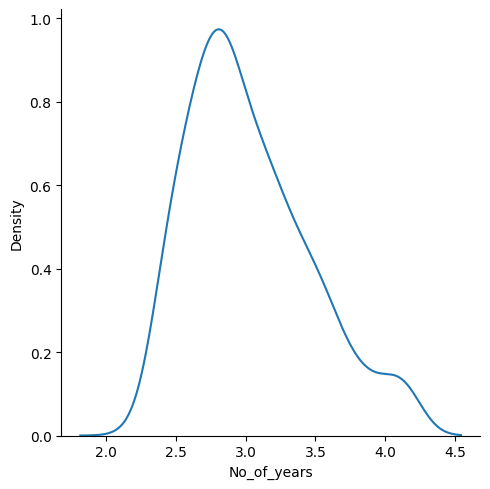

In [25]:
for col in ['Present_Price','Selling_Price','Kms_Driven','No_of_years']:
    print(col)
    print(df[col].skew())
    plt.figure()
    sns.displot(df[col],kind='kde')
    plt.show()
    skw[col]=df[col].skew()

In [26]:
x=df.drop('Selling_Price',axis=1)
y=df['Selling_Price']

<Axes: >

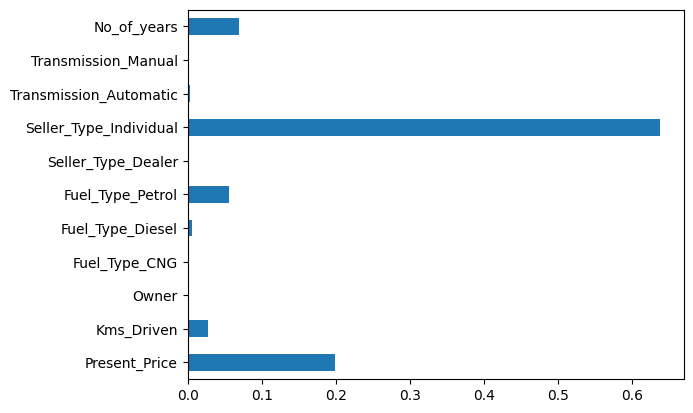

In [27]:
reg=ExtraTreeRegressor()
reg.fit(x,y)
imp_fet=pd.Series(reg.feature_importances_,index=x.columns)
imp_fet.plot(kind='barh')

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [29]:
scaler=StandardScaler()
x_train_scale=scaler.fit_transform(np.array(x_train).reshape(-1,1))
y_train_scale=scaler.fit_transform(np.array(y_train).reshape(-1,1))

#### DecisionTreeRegressor

In [30]:
model=DecisionTreeRegressor()

In [31]:
path=model.cost_complexity_pruning_path(x_train,y_train)
alphas=path['ccp_alphas']
# alphas

In [32]:
# No. of features to consider at every split
max_features = ['sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 25, num = 5)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [33]:
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['sqrt'], 'max_depth': [5, 10, 15, 20, 25], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [34]:

rf_random = RandomizedSearchCV(estimator = model, 
                               param_distributions = random_grid,
                               scoring = 'neg_mean_squared_error', 
                               n_iter = 10,
                               verbose = 2, 
                               cv=5,
                               n_jobs = -1)

In [35]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   scoring='neg_mean_squared_error', verbose=2)

In [36]:
rf_random.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [37]:
predicted_y_values = rf_random.predict(x_test)

In [38]:
r2_score(y_test, predicted_y_values)

0.9277324250622931

In [39]:
mean_absolute_error(y_test,predicted_y_values)

0.1671892654878075

In [40]:
mean_squared_error(y_test,predicted_y_values)

0.07948623039401889

<Axes: xlabel='Selling_Price', ylabel='Density'>

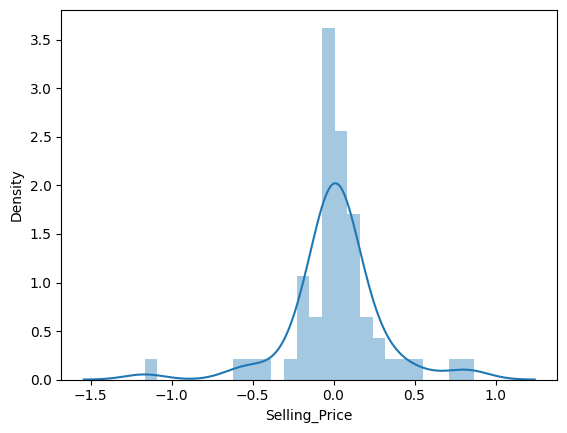

In [41]:
sns.distplot(y_test- predicted_y_values)

Center of the Distribution
- centered around 0, it indicates the model's predictions are generally unbiased, neither systematically overpredicting nor underpredicting prices.

Shape of the Distribution
- Symmetrical Distribution: Suggests a balanced spread of errors

Spread of the Distribution:
- Narrower distribution implies more precise predictions with smaller errors.


In [42]:

df_pred = pd.DataFrame({'Real_Values':y_test, 'Predicted_Values':predicted_y_values})
df_pred.head()

,Real_Values,Predicted_Values
177,0.591608,0.582063
103,1.204159,1.211426
256,3.201562,2.682280
66,3.704727,2.935230
165,0.670820,0.651638


<Axes: xlabel='Real_Values', ylabel='Predicted_Values'>

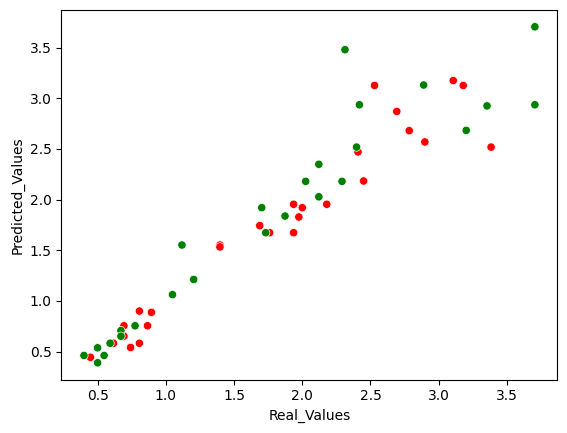

In [43]:
sns.scatterplot(x=df_pred['Real_Values'],y=df_pred['Predicted_Values']
                ,data=df_pred,
                hue=df['Selling_Price']
                ,palette=['red','green']
                ,legend=False)

- Narrower spread implies higher model accuracy and consistency.

- Decisiontree,The model has moderate predictive power, accounting for a reasonable portion of the variance in selling prices.

### Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [45]:
# No. of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# No. of features to consider at every split
max_features = ['sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [46]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [47]:
rf_random = RandomizedSearchCV(estimator = model, 
                               param_distributions = random_grid,
                               scoring = 'neg_mean_squared_error', 
                               n_iter = 50, 
                               cv = 10,
                               verbose = 2,
                               n_jobs = -1)

In [48]:
rf_random.fit(x_train, y_train)


Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [49]:
y_pred = rf_random.predict(x_test)

In [50]:
r2_score(y_test, y_pred)

0.9651457701130703

In [54]:
mean_absolute_error(y_test, y_pred)

0.1263101120828657

In [55]:
mean_squared_error(y_test, y_pred)

0.03833574531021197

*  Indicates a very strong correlation between predicted and actual values,

In [51]:
df_pred = pd.DataFrame({'Real_Values':y_test, 'Predicted_Values':predicted_y_values})
df_pred.head()

,Real_Values,Predicted_Values
177,0.591608,0.582063
103,1.204159,1.211426
256,3.201562,2.682280
66,3.704727,2.935230
165,0.670820,0.651638


<Axes: xlabel='Real_Values', ylabel='Predicted_Values'>

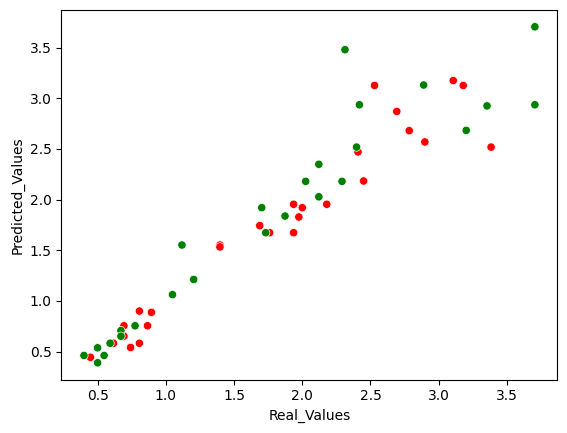

In [52]:
sns.scatterplot(x=df_pred['Real_Values'],y=df_pred['Predicted_Values']
                ,data=df_pred,
                hue=df['Selling_Price']
                ,palette=['red','green']
                ,legend=False)

- Narrower spread implies higher model accuracy and consistency.

<Axes: xlabel='Selling_Price', ylabel='Density'>

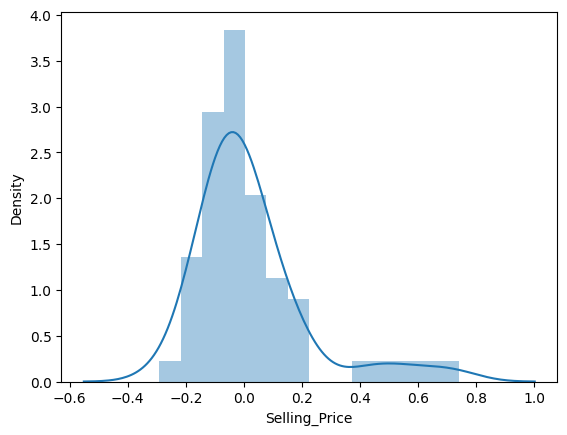

In [53]:
sns.distplot(y_test-y_pred)

* Centered around 0, indicating no systematic bias in predictions (neither over- nor underpredicting)
* A single peak suggests a consistent pattern of errors.

Random forest model shows considerable promise for accurately predicting used car selling prices.